In [ ]:
# install
!pip install pmdarima

In [ ]:
# Import Packages
import pandas as pd
import numpy as np

In [ ]:
# Mount the cloud folder for data file storage
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
csvFile = "/content/gdrive/MyDrive/Colab Notebooks/kz.csv"

# reading the csv file to get symptoms and outcomes data
df_data = pd.read_csv(csvFile)
data = pd.read_csv(csvFile)

Mounted at /content/gdrive


In [ ]:
# Loading the dataset
df_data['event_time'] = df_data['event_time'].replace(" UTC","", regex=True)
df_data['event_time'] = pd.to_datetime(df_data['event_time'])
df_data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18
...,...,...,...,...,...,...,...,...
2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18
2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18
2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18
2633519,2020-11-21 10:10:30,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18


In [ ]:
# Data transaformation
# Split the categories into sub categories
df_data[['l1_cat', 'l2_cat', 'l3_cat']] = df_data['category_code'].str.split('.',expand=True)

df_data

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,l1_cat,l2_cat,l3_cat
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,electronics,tablet,None
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,electronics,tablet,None
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,electronics,audio,headphone
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,electronics,audio,headphone
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2633516,2020-11-21 10:10:01,2388440981134693942,1515966223526602848,2.268105e+18,electronics.smartphone,oppo,138.87,1.515916e+18,electronics,smartphone,None
2633517,2020-11-21 10:10:13,2388440981134693943,1515966223509089282,2.268105e+18,electronics.smartphone,apple,418.96,1.515916e+18,electronics,smartphone,None
2633518,2020-11-21 10:10:30,2388440981134693944,1515966223509089917,2.268105e+18,appliances.personal.scales,vitek,12.48,1.515916e+18,appliances,personal,scales
2633519,2020-11-21 10:10:30,2388440981134693944,2273948184839454837,2.268105e+18,NaN,moulinex,41.64,1.515916e+18,NaN,NaN,NaN


In [ ]:
# Describe Data + some data cleaning
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 11 columns):
 #   Column         Dtype         
---  ------         -----         
 0   event_time     datetime64[ns]
 1   order_id       int64         
 2   product_id     int64         
 3   category_id    float64       
 4   category_code  object        
 5   brand          object        
 6   price          float64       
 7   user_id        float64       
 8   l1_cat         object        
 9   l2_cat         object        
 10  l3_cat         object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 221.0+ MB


In [ ]:
df_data.describe()

,event_time,order_id,product_id,category_id,price,user_id
count,2633521,2.633521e+06,2.633521e+06,2.201567e+06,2.201567e+06,5.641690e+05
mean,2020-01-16 19:57:05.412119808,2.361783e+18,1.674080e+18,2.273827e+18,1.540932e+02,1.515916e+18
min,1970-01-01 00:33:40,2.294360e+18,1.515966e+18,2.268105e+18,0.000000e+00,1.515916e+18
25%,2020-03-05 15:42:44,2.348807e+18,1.515966e+18,2.268105e+18,1.456000e+01,1.515916e+18
50%,2020-06-08 08:33:27,2.353254e+18,1.515966e+18,2.268105e+18,5.553000e+01,1.515916e+18
75%,2020-08-24 06:52:14,2.383131e+18,1.515966e+18,2.268105e+18,1.967400e+02,1.515916e+18
max,2020-11-21 10:10:30,2.388441e+18,2.388434e+18,2.374499e+18,5.092590e+04,1.515916e+18
std,NaN,1.716538e+16,3.102249e+17,2.353247e+16,2.419421e+02,2.379057e+07


In [ ]:
# calculate percentage of missing value
df_data.isnull().sum()/len(df_data)

,0
event_time,0.000000
order_id,0.000000
product_id,0.000000
category_id,0.164021
category_code,0.232465
brand,0.192140
price,0.164021
user_id,0.785774
l1_cat,0.232465
l2_cat,0.232465


In [ ]:
print("Min Date: ", df_data['event_time'].min())
print("Max Date: ", df_data['event_time'].max())

Min Date:  1970-01-01 00:33:40
Max Date:  2020-11-21 10:10:30


In [ ]:
df_data['year'] = df_data['event_time'].dt.year
df_data.groupby(['year'])['year'].count()

,year
year,
1970,19631
2020,2613890


In [ ]:
df_data = df_data[df_data['year'] != 1970].reset_index(drop=True)

In [ ]:
df_data = df_data[df_data['user_id'].notna()].reset_index(drop=True)

In [ ]:
# Handling missing price values
products_median_prices = df_data.groupby(['product_id'])['price'].median().reset_index()
products_median_prices = pd.Series(df_data['price'].values, index=df_data['product_id']).to_dict()

# fill in missing prices with the median
df_data['price'] = df_data['price'].fillna(df_data['product_id'].map(products_median_prices))
df_data['price'].isna().sum()

0

In [ ]:
# Import libraries - 2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.nonparametric.smoothers_lowess import lowess

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# drop all other columns except the two below
data = data[['event_time', 'price']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 2 columns):
 #   Column      Dtype  
---  ------      -----  
 0   event_time  object 
 1   price       float64
dtypes: float64(1), object(1)
memory usage: 40.2+ MB


In [ ]:
# data preprocessing
data = data.drop_duplicates()
data.isnull().sum()

,0
event_time,0
price,241375


In [ ]:
# remove rows where 'price' contains NaNs
data = data[~data['price'].isnull()]
data

,event_time,price
0,2020-04-24 11:50:39 UTC,162.01
2,2020-04-24 14:37:43 UTC,77.52
4,2020-04-24 19:16:21 UTC,217.57
5,2020-04-26 08:45:57 UTC,39.33
6,2020-04-26 09:33:47 UTC,1387.01
...,...,...
2633516,2020-11-21 10:10:01 UTC,138.87
2633517,2020-11-21 10:10:13 UTC,418.96
2633518,2020-11-21 10:10:30 UTC,12.48
2633519,2020-11-21 10:10:30 UTC,41.64


In [ ]:
data.isnull().sum()

,0
event_time,0
price,0


In [ ]:
data.describe(include='all')

,event_time,price
count,2139643,2.139643e+06
unique,1299919,NaN
top,1970-01-01 00:33:40 UTC,NaN
freq,674,NaN
mean,NaN,1.557634e+02
std,NaN,2.436082e+02
min,NaN,0.000000e+00
25%,NaN,1.502000e+01
50%,NaN,5.785000e+01
75%,NaN,2.013700e+02


In [ ]:
# exclude event_time rows that contain 1970
data = data[~data['event_time'].str.contains('1970')]
#remove UTC from event_time
data['event_time'] = data['event_time'].str.replace('UTC','')
data.describe(include='all')

,event_time,price
count,2138969,2.138969e+06
unique,1299918,NaN
top,2020-04-09 16:30:01,NaN
freq,155,NaN
mean,NaN,1.557135e+02
std,NaN,2.434253e+02
min,NaN,0.000000e+00
25%,NaN,1.502000e+01
50%,NaN,5.785000e+01
75%,NaN,2.013700e+02


In [ ]:
# create date column
data['date'] = data.event_time.apply(lambda x: x.split(' ')[0])

# convert to datetime object
data['date'] = pd.to_datetime(data['date'])
# delete event_time column
del data['event_time']
data.head()

,price,date
0,162.01,2020-04-24
2,77.52,2020-04-24
4,217.57,2020-04-24
5,39.33,2020-04-26
6,1387.01,2020-04-26


In [ ]:
# create a new time series
df = data.groupby('date').agg(sales=('price', 'sum'))
df.head()

,sales
date,
2020-01-05,1151017.74
2020-01-06,1014544.86
2020-01-07,1369143.81
2020-01-08,886054.44
2020-01-09,787447.75


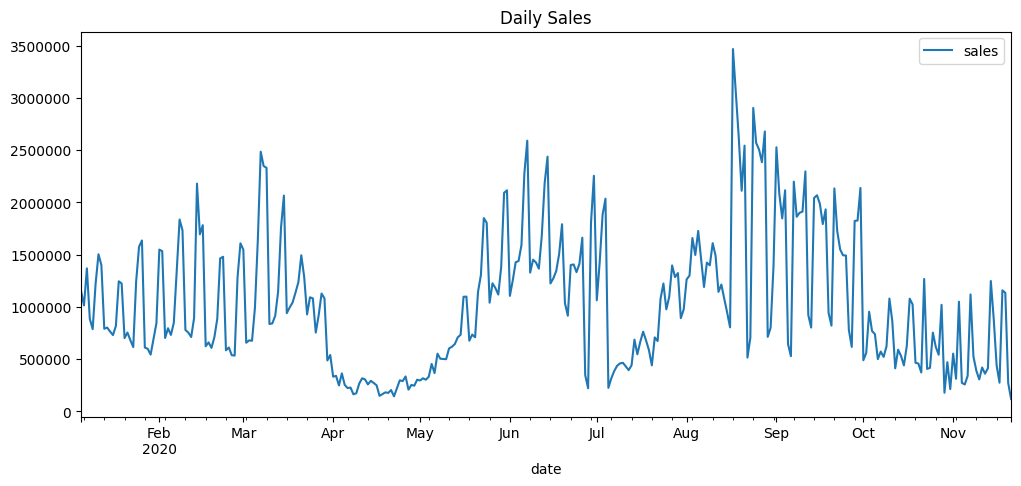

In [ ]:
# visualize the time series data
fig, ax = plt.subplots()
plt.ticklabel_format(style='plain')
fig = df.plot(figsize=(12,5), ax=ax)
plt.title('Daily Sales')
plt.show()

In [ ]:
# Define RFM Dataset - 1
from pandas.tseries.offsets import MonthEnd

df_data['month_key'] = df_data['event_time'].dt.month
df_data[['event_time', 'month_key']]

,event_time,month_key
0,2020-04-24 11:50:39,4
1,2020-04-24 11:50:39,4
2,2020-04-24 14:37:43,4
3,2020-04-24 14:37:43,4
4,2020-04-24 19:16:21,4
...,...,...
562857,2020-11-21 10:10:01,11
562858,2020-11-21 10:10:13,11
562859,2020-11-21 10:10:30,11
562860,2020-11-21 10:10:30,11


In [ ]:
# creating a new dataframe
df_month_keys = pd.DataFrame({"month_key":df_data['month_key'].unique(), 'key':0})
df_user_ids = pd.DataFrame({"user_id":df_data['user_id'].unique(), 'key':0})

df_rfm = df_month_keys.merge(df_user_ids, on='key', how='outer')
df_rfm = df_rfm.drop(columns=['key'])
df_rfm = df_rfm.sort_values(by=['user_id', 'month_key']).reset_index(drop=True)
df_rfm

,month_key,user_id
0,1,1.515916e+18
1,2,1.515916e+18
2,3,1.515916e+18
3,4,1.515916e+18
4,5,1.515916e+18
...,...,...
1080679,7,1.515916e+18
1080680,8,1.515916e+18
1080681,9,1.515916e+18
1080682,10,1.515916e+18


In [ ]:
# Recency
# User last month purchase
df_user_month_purchases = df_data[['month_key', 'user_id']].drop_duplicates()
df_user_month_purchases['last_purchase'] = df_user_month_purchases['month_key']

df_rfm = df_rfm.merge(df_user_month_purchases, how='left', on=['month_key', 'user_id'])

# filling the last_purchase month
user_ids = df_rfm[['user_id']]
df_rfm = df_rfm.groupby('user_id').ffill()
df_rfm['R_months_since_last_purchase'] = df_rfm['month_key'] - df_rfm['last_purchase']
df_rfm['user_id'] = user_ids
df_rfm.head(20)

,month_key,last_purchase,R_months_since_last_purchase,user_id
0,1,NaN,NaN,1.515916e+18
1,2,NaN,NaN,1.515916e+18
2,3,NaN,NaN,1.515916e+18
3,4,NaN,NaN,1.515916e+18
4,5,NaN,NaN,1.515916e+18
5,6,NaN,NaN,1.515916e+18
6,7,7.0,0.0,1.515916e+18
7,8,7.0,1.0,1.515916e+18
8,9,7.0,2.0,1.515916e+18
9,10,7.0,3.0,1.515916e+18


In [ ]:
# Frequency
# user last month purchase orders count
df_user_month_purchases = df_data.groupby(['month_key', 'user_id'])['order_id'].nunique().reset_index()
df_rfm = df_rfm.merge(df_user_month_purchases, how='left', on=['month_key', 'user_id'])

# filling the last_purchase month
user_ids = df_rfm[['user_id']]
df_rfm = df_rfm.groupby('user_id').ffill()
df_rfm['user_id'] = user_ids
df_rfm = df_rfm.rename(columns={"order_id":"F_last_monthly_purchases_count"})
df_rfm.head(20)

,month_key,last_purchase,R_months_since_last_purchase,F_last_monthly_purchases_count,user_id
0,1,NaN,NaN,NaN,1.515916e+18
1,2,NaN,NaN,NaN,1.515916e+18
2,3,NaN,NaN,NaN,1.515916e+18
3,4,NaN,NaN,NaN,1.515916e+18
4,5,NaN,NaN,NaN,1.515916e+18
5,6,NaN,NaN,NaN,1.515916e+18
6,7,7.0,0.0,1.0,1.515916e+18
7,8,7.0,1.0,1.0,1.515916e+18
8,9,7.0,2.0,1.0,1.515916e+18
9,10,7.0,3.0,1.0,1.515916e+18
